In [3]:
import pandas as pd
import numpy as np
from iso3166 import countries_by_name
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx


In [4]:
# Directories
OUTPUT_DIR = '../Outputs/country_clusters/'

## Revealed Competitive Advantage

In [5]:
fname = 'https://raw.githubusercontent.com/QuantEcon/WAMS-2017/master/Matt/data/year_origin_sitc_rev2.csv'
df = pd.read_csv(fname)

In [6]:
df

,year,origin,sitc,export
0,1962,AFG,230,4000.0
1,1962,AFG,250,66000.0
2,1962,AFG,540,74000.0
3,1962,AFG,545,17000.0
4,1962,AFG,548,33000.0
...,...,...,...,...
3779902,2014,ZWE,9310,910055.0
3779903,2014,ZWE,9410,NaN
3779904,2014,ZWE,9510,NaN
3779905,2014,ZWE,9610,NaN


In [7]:
total_vol = df[["year", "origin", "export"]].groupby(["year", "origin"]).sum()

In [8]:
df["cntry_export"] = df[["year", "origin", "export"]].groupby(by=["year", "origin"]).transform(sum)
df["prod_export"] = df[["year", "sitc", "export"]].groupby(by=["year", "sitc"]).transform(sum)
df["world_export"] = df[["year", "export"]].groupby(by=["year"]).transform(sum)
df["rca"] = (df["export"] / df["cntry_export"]) / (df["prod_export"] / df["world_export"])
df

,year,origin,sitc,export,cntry_export,prod_export,world_export,rca
0,1962,AFG,230,4000.0,8.613500e+07,4.385810e+08,1.428420e+11,0.015125
1,1962,AFG,250,66000.0,8.613500e+07,2.614480e+08,1.428420e+11,0.418634
2,1962,AFG,540,74000.0,8.613500e+07,4.892400e+07,1.428420e+11,2.508338
3,1962,AFG,545,17000.0,8.613500e+07,3.491880e+08,1.428420e+11,0.080736
4,1962,AFG,548,33000.0,8.613500e+07,8.512600e+07,1.428420e+11,0.642877
...,...,...,...,...,...,...,...,...
3779902,2014,ZWE,9310,910055.0,3.063741e+09,1.764567e+12,1.763851e+13,0.002969
3779903,2014,ZWE,9410,NaN,3.063741e+09,1.058101e+09,1.763851e+13,NaN
3779904,2014,ZWE,9510,NaN,3.063741e+09,9.870492e+09,1.763851e+13,NaN
3779905,2014,ZWE,9610,NaN,3.063741e+09,3.865394e+08,1.763851e+13,NaN


In [9]:
# produce yearly rca
rca = {}
for year in range(2000,2015):
    yr = df[df.year == year].set_index(['origin', 'sitc']).unstack('sitc')['rca']
    rca[year] = yr

In [10]:
# https://www.msci.com/developed-markets
dm_countries = ['Canada', 'Austria', 'Italy', 'Australia', 'USA', 'Belgium',
       'Netherlands', 'Hong Kong', 'Denmark', 'Norway', 'Japan',
       'Finland', 'Portugal', 'New Zealand', 'France', 'Spain',
       'Singapore', 'Germany', 'Sweden', 'Ireland', 'Switzerland',
       'Israel', 'United Kingdom of Great Britain and Northern Ireland']

In [11]:
em_countries = ['Argentina','Bangladesh', 'Brazil', 'Bulgaria','Chile','China',
 'Colombia','Czechia','Egypt','Greece','Hungary','India','Indonesia',
 'Iran, Islamic Republic of','Israel','Kuwait', 'Malaysia', 'Mauritius','Mexico', 'Morocco',
 'Nigeria', 'Oman','Pakistan', 'Peru','Philippines', 'Poland','Qatar', 'Romania',
 'Russian Federation', 'Saudi Arabia','South Africa','Korea, Republic of','Taiwan, Province of China', 'Thailand',
 'Turkey', 'Ukraine','United Arab Emirates','Venezuela, Bolivarian Republic of']

In [12]:
codemap = {}
for k in em_countries:
    try:
        codemap[k] = countries_by_name[k.upper()].alpha3
    except:
        print(k)

In [13]:
for k in dm_countries:
    try:
        codemap[k] = countries_by_name[k.upper()].alpha3
    except:
        print(k)

USA


In [14]:
codemap['USA'] = 'USA'

In [15]:
cntry = [codemap[k] for k in codemap]
rcacorr = {}
for yr in range(2000,2015):
    rcadf = rca[yr]
    rcacorr[yr] = rcadf[rcadf.index.isin(cntry)].T.corr()

<AxesSubplot:xlabel='origin', ylabel='origin'>

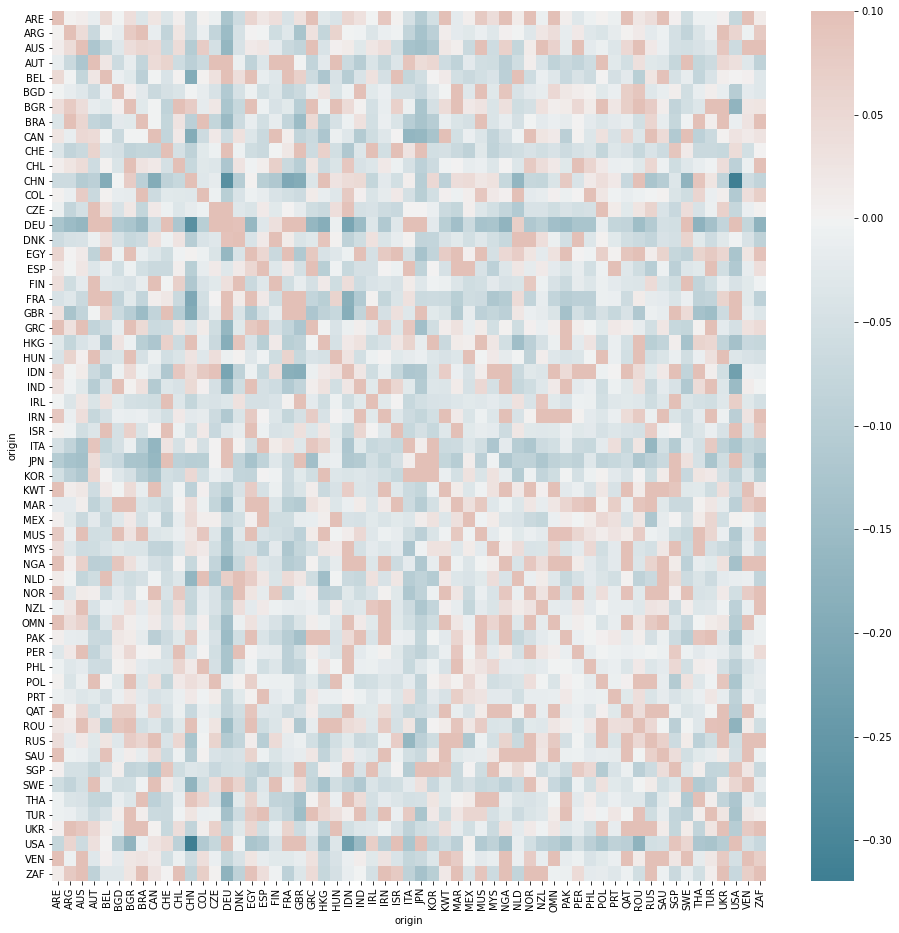

In [16]:
cmap = sns.diverging_palette(220, 20, as_cmap=True)
fig,ax = plt.subplots(figsize = (16,16))
sns.heatmap(rcacorr[2001],vmax=0.1, center = 0, cmap = cmap, ax = ax)

In [17]:
equity_etf_clusters = pd.read_pickle(OUTPUT_DIR + 'clusters_equity_etf_full.pkl')
equity_etf_clusters.head()

,Countries,cluster_label
0,Pakistan,0
1,Saudi Arabia,0
2,Qatar,0
3,Egypt,0
4,United Arab Emirates,0


In [41]:
equity_etf_clusters['Code'] = equity_etf_clusters['Countries'].map(codemap)

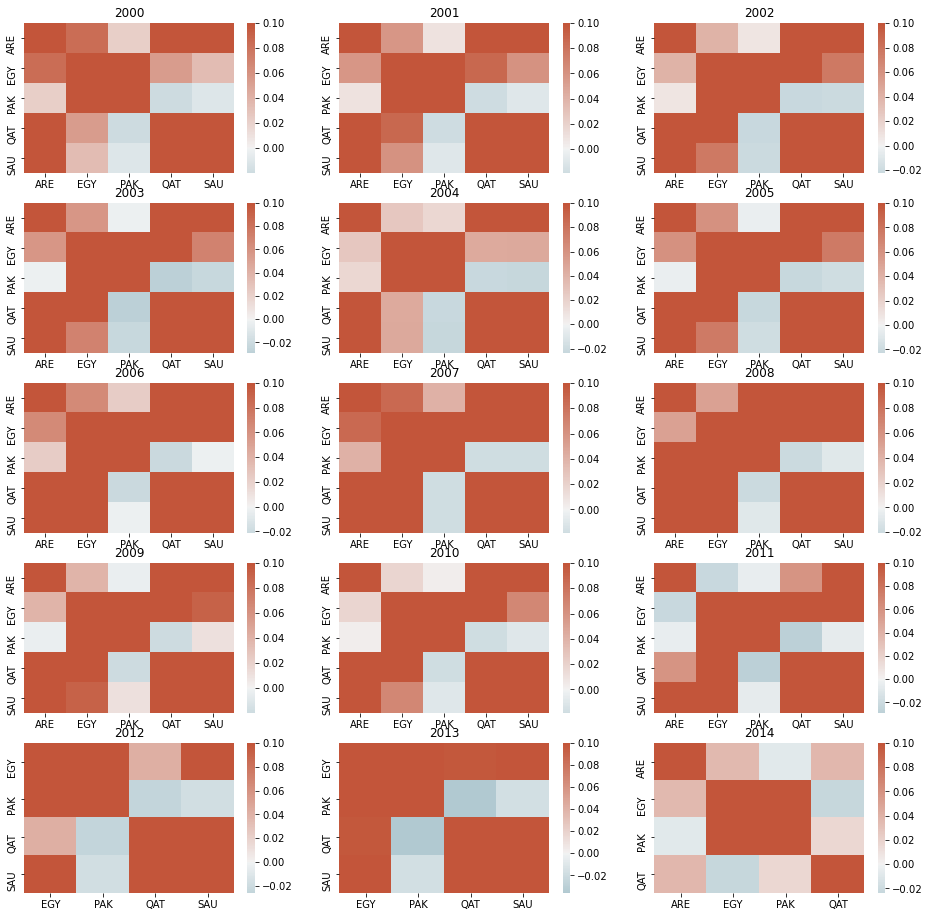

In [107]:
cntries = equity_etf_clusters[equity_etf_clusters.cluster_label==0]['Code']
fig,axes = plt.subplots(5,3, figsize = (16,16))
for i,ax in enumerate(axes.reshape(-1)):
    temp = rcacorr[2000+i]
    cty_idx = temp.index.isin(cntries)
    sns.heatmap(temp[cty_idx][temp.columns[cty_idx]],vmax=0.1, center = 0, cmap = cmap, ax = ax)
    ax.set_title(2000+i)
    ax.set_xlabel('')
    ax.set_ylabel('')

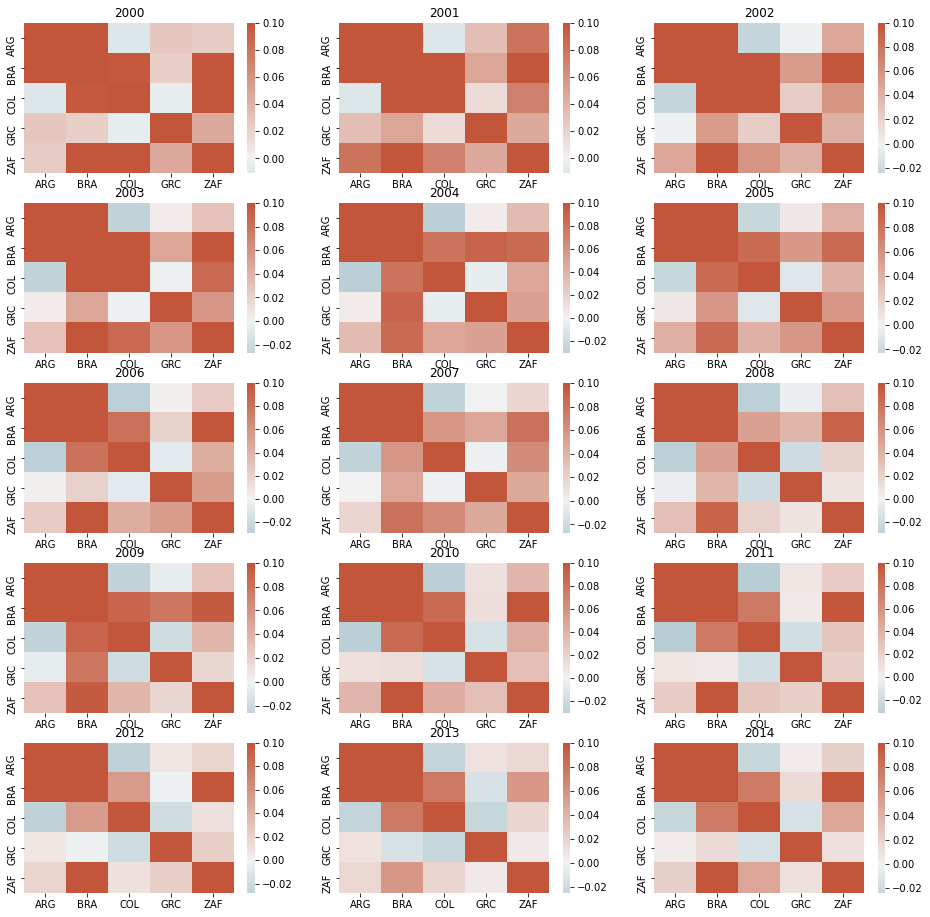

In [108]:
cntries = equity_etf_clusters[equity_etf_clusters.cluster_label==1]['Code']
fig,axes = plt.subplots(5,3, figsize = (16,16))
for i,ax in enumerate(axes.reshape(-1)):
    temp = rcacorr[2000+i]
    cty_idx = temp.index.isin(cntries)
    sns.heatmap(temp[cty_idx][temp.columns[cty_idx]],vmax=0.1, center = 0, cmap = cmap, ax = ax)
    ax.set_title(2000+i)
    ax.set_xlabel('')
    ax.set_ylabel('')

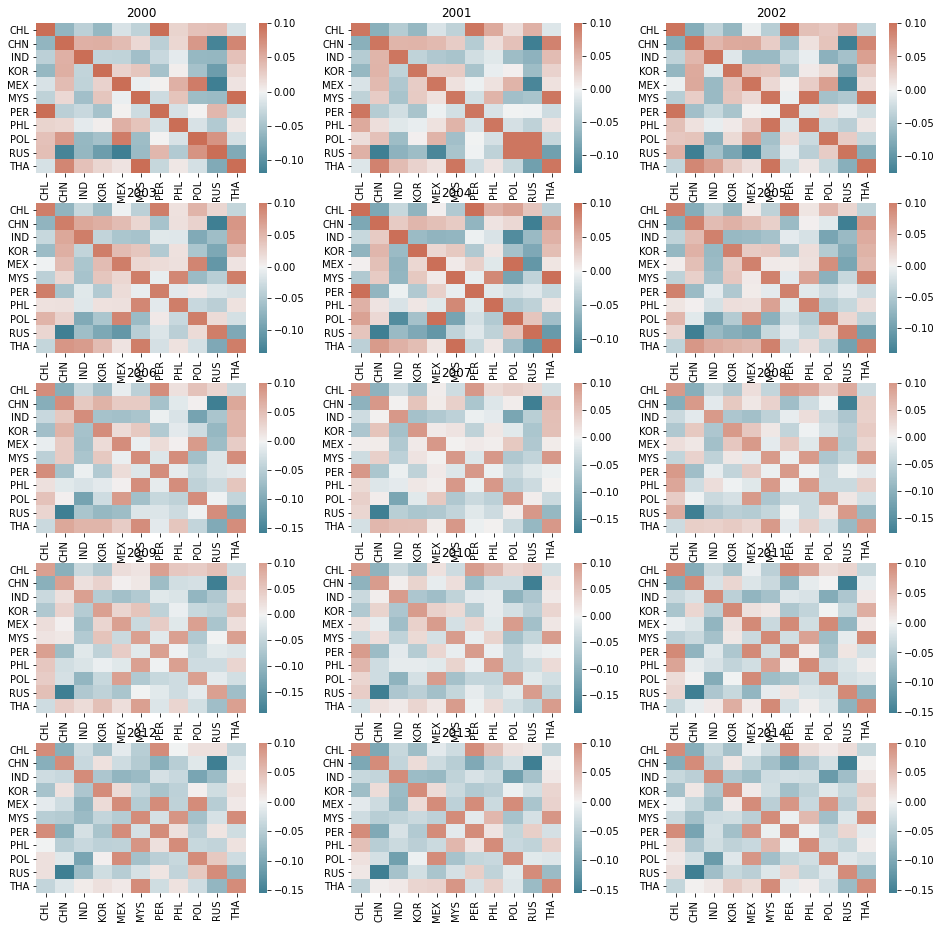

In [109]:
cntries = equity_etf_clusters[equity_etf_clusters.cluster_label==3]['Code']
fig,axes = plt.subplots(5,3, figsize = (16,16))
for i,ax in enumerate(axes.reshape(-1)):
    temp = rcacorr[2000+i]
    cty_idx = temp.index.isin(cntries)
    sns.heatmap(temp[cty_idx][temp.columns[cty_idx]],vmax=0.1, center = 0, cmap = cmap, ax = ax)
    ax.set_title(2000+i)
    ax.set_xlabel('')
    ax.set_ylabel('')

## DM Extension

In [50]:
DM_countries = ['Australia', 'New Zealand', 'France', 'Germany', 'Italy', 'Japan', 'United Kingdom', 'United States']
dm_map = pd.DataFrame({'Country':DM_countries})
dm_map['Code']=dm_map['Country'].map(codemap)

temp = rcacorr[2013]
cntries = equity_etf_clusters[equity_etf_clusters.cluster_label==0]['Code']
cty_idx = temp.index.isin(dm_map['Code'].tolist()+cntries.tolist())
corr = temp[cty_idx][temp.columns[cty_idx]]

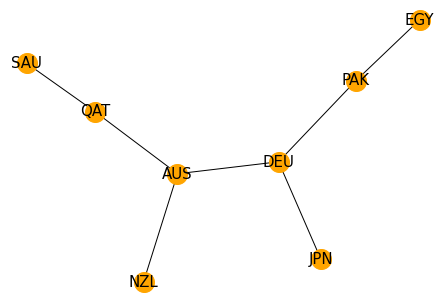

In [64]:
# corr.index.name = ''
links = corr.stack().reset_index()
links.columns = ['var1', 'var2','value']
links_filtered=links.loc[ (abs(links['value']) > 0.16) & (links['var1'] != links['var2']) ]
links_filtered
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2', edge_attr=True)
 
# Plot the network:
nx.draw(G, with_labels=True, node_color='orange', node_size=400, edge_color='black', linewidths=1, font_size=15)


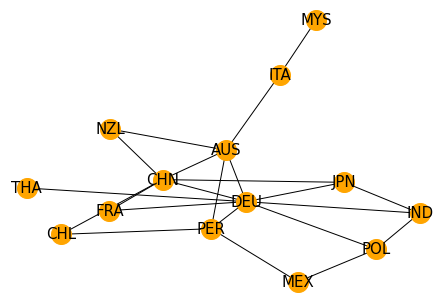

In [67]:
DM_countries = ['Australia', 'New Zealand', 'France', 'Germany', 'Italy', 'Japan', 'United Kingdom', 'United States']
dm_map = pd.DataFrame({'Country':DM_countries})
dm_map['Code']=dm_map['Country'].map(codemap)

temp = rcacorr[2013]
cntries = equity_etf_clusters[equity_etf_clusters.cluster_label==3]['Code']
cty_idx = temp.index.isin(dm_map['Code'].tolist()+cntries.tolist())
corr = temp[cty_idx][temp.columns[cty_idx]]
corr.index.name = ''
links = corr.stack().reset_index()
links.columns = ['var1', 'var2','value']
links_filtered=links.loc[ (abs(links['value']) > 0.1) & (links['var1'] != links['var2']) ]
links_filtered
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2', edge_attr=True)
 
# Plot the network:
nx.draw(G, with_labels=True, node_color='orange', node_size=400, edge_color='black', linewidths=1, font_size=15)


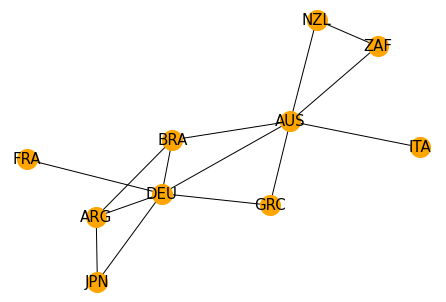

In [70]:
DM_countries = ['Australia', 'New Zealand', 'France', 'Germany', 'Italy', 'Japan', 'United Kingdom', 'United States']
dm_map = pd.DataFrame({'Country':DM_countries})
dm_map['Code']=dm_map['Country'].map(codemap)

temp = rcacorr[2013]
cntries = equity_etf_clusters[equity_etf_clusters.cluster_label==1]['Code']
cty_idx = temp.index.isin(dm_map['Code'].tolist()+cntries.tolist())
corr = temp[cty_idx][temp.columns[cty_idx]]
corr.index.name = ''
links = corr.stack().reset_index()
links.columns = ['var1', 'var2','value']
links_filtered=links.loc[ (abs(links['value']) > 0.1) & (links['var1'] != links['var2']) ]
links_filtered
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2', edge_attr=True)
 
# Plot the network:
nx.draw(G, with_labels=True, node_color='orange', node_size=400, edge_color='black', linewidths=1, font_size=15)


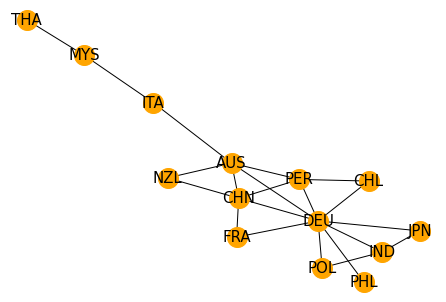

In [69]:
DM_countries = ['Australia', 'New Zealand', 'France', 'Germany', 'Italy', 'Japan', 'United Kingdom', 'United States']
dm_map = pd.DataFrame({'Country':DM_countries})
dm_map['Code']=dm_map['Country'].map(codemap)

temp = rcacorr[2014]
cntries = equity_etf_clusters[equity_etf_clusters.cluster_label==3]['Code']
cty_idx = temp.index.isin(dm_map['Code'].tolist()+cntries.tolist())
corr = temp[cty_idx][temp.columns[cty_idx]]
corr.index.name = ''
links = corr.stack().reset_index()
links.columns = ['var1', 'var2','value']
links_filtered=links.loc[ (abs(links['value']) > 0.1) & (links['var1'] != links['var2']) ]
links_filtered
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2', edge_attr=True)
 
# Plot the network:
nx.draw(G, with_labels=True, node_color='orange', node_size=400, edge_color='black', linewidths=1, font_size=15)
